# Homework 5: Clustering

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [ ]:
MY_UNIQNAME = 'huangmy'

# Part 1: Clustering Music Preferences

In another class, students were asked about their music preferences by rating each of 11 music genres on a 
scale from 1 (=no way) to 10 (=love it).  The de-indentified results are in the data/music.csv file distributed with this
assignment.

In [102]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet, fcluster
from scipy.spatial.distance import pdist

import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
music = pd.read_csv('data/homework5/music.csv')

In [3]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
0,Muriel,8,7,2,6,8,8,7,6,8,9,9
1,Alexis,4,10,4,3,3,1,10,4,6,5,8
2,Alison,5,10,6,2,3,1,5,6,6,3,5
3,Christopher,3,3,4,3,7,10,2,6,9,8,7
4,Merle,3,3,4,5,6,6,6,4,5,5,6


Your goal for this assignment will be to cluster these preferences using a variety of techniques, including one new one.

### Q1 (40 points). Perform K-means clustering on the music preference data
- Identify the best *k* by using methods that we covered from the lab.
- Plot your results and provide your interpretations.
    - What do you like/dislike about the results?
    - What would improve the results?
    - Explain why.


In [33]:
from sklearn.preprocessing import scale
n_samples = len(music)
process_music = music.iloc[:, 1:]
process_music = np.array(process_music)
process_music[0:5]

array([[ 8,  7,  2,  6,  8,  8,  7,  6,  8,  9,  9],
       [ 4, 10,  4,  3,  3,  1, 10,  4,  6,  5,  8],
       [ 5, 10,  6,  2,  3,  1,  5,  6,  6,  3,  5],
       [ 3,  3,  4,  3,  7, 10,  2,  6,  9,  8,  7],
       [ 3,  3,  4,  5,  6,  6,  6,  4,  5,  5,  6]], dtype=int64)

In [36]:
# method1 -- rule of thumb
num_thumb = round(np.sqrt(n_samples/2))
k_means_thumb = KMeans(init='k-means++', n_clusters=int(num_thumb), n_init=10)
print(k_means_thumb.fit(process_music))
print('number of clusters in Rule of Thumb')
print(num_thumb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
number of clusters in Rule of Thumb
5.0


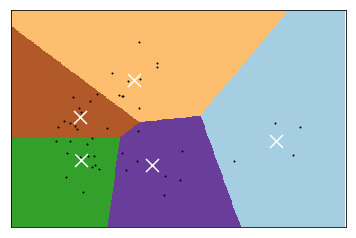

In [269]:
from sklearn.decomposition import PCA

def plot_kmeans(number_):
    # use PCA method to transform data first
    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans = KMeans(init='k-means++', n_clusters=int(number_), n_init=10)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

plot_kmeans(num_thumb)

#### Comment for Rule of Thumb method:
* According to rule of thumb, the best number of clusters should be 5. The plot has been shown above. Normalization before clustering may be helpful here. Also, since the number of clusters has been decided before the process, it is hard to tell whether this result is the most effective and suitable for this data set. 

#### Some detailed explanation for elbow method:
* The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).
* At each stage of cluster analysis the total SSE is minimized with SSEtotal = SSE1 + SSE2 + SSE3 + SSE4 ....  + SSEn. At the initial stage when each case is its own cluster this of course will be 0.

Text(0.5, 1.0, 'Elbow Method')

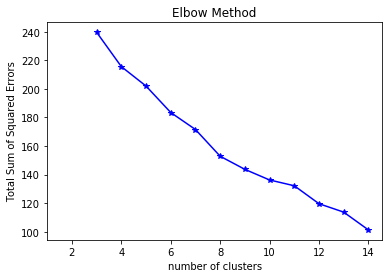

In [266]:
np.random.seed(0)
# elbow method
from sklearn import metrics
# Use inertia, the within-cluster sum of squares as the criterion for the elbow method
cost = []
max_cl = 15
for k in range(3, max_cl):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(k_means.inertia_)  # here k_means.inertia_ represents the elbow

fig, ax = plt.subplots()
plt.plot(range(3, max_cl), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])
plt.xlabel('number of clusters')
plt.ylabel('Total Sum of Squared Errors')
plt.title('Elbow Method')
# around 10 clusters would be suitable here

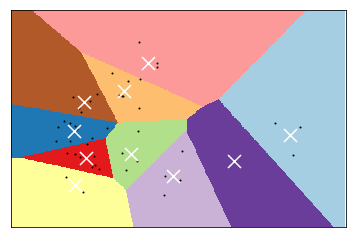

In [270]:
plot_kmeans(10)

#### Comment for Elbow method:
* According to Elbow method, by observing diminishing returns to increasing k, we can tell that k around 10 would be proper in this data set. Thus the best number of clusters should be 10. The 'total sum of squared error' plot has been shown above.  Also, since the number of clusters has been decided before the process, it is hard to tell whether this result is the most effective and suitable for this data set. 
* Compared with the first 'Rule of Thumb' method, this number of clusters is a little bit higher. Sample size here is smaller than 50 thus this clustering result may be a little redundant in this case.

#### Some detailed explanation for Silhouette method:
* The silhouette coefficient is a measure of how closely a particular datum is matched to data and how loosely it is matched to data of that neighboring cluster. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters
* You'd therefore expect that a datum that's a good match for its cluster to have a silhouette of 1, and a data that's a poor match to have a score of -1. We can find the average silhouette of the data for particular values of k, and choose the maximum.

Text(0.5, 1.0, 'Sihouette Method')

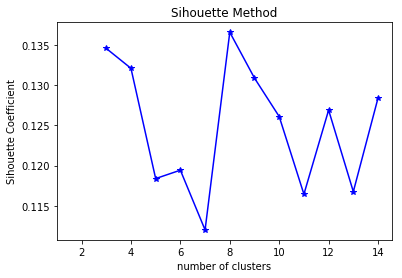

In [71]:
# the Sihouette method
np.random.seed(0)
cost = []
for k in range(3, max_cl):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_)) 
    # Here represents takes two arguments: data and k_means.labels_

fig, ax = plt.subplots()
plt.plot(range(3, max_cl), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])
plt.xlabel('number of clusters')
plt.ylabel('Sihouette Coefficient')
plt.title('Sihouette Method')
# around 8 clusters would be suitable here

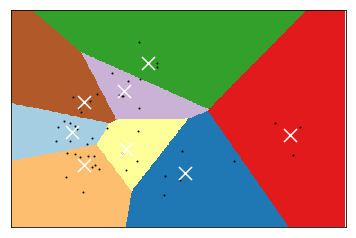

In [271]:
plot_kmeans(8)

#### Comment for Sihouette method:
* According to Sihouette method, we need to find the average silhouette of the data for particular values of k, and choose the maximum. We can tell that k around 10 would be proper in this data set. Thus the best number of clusters should be 8. The 'Sihouette Coefficient' plot has been shown above. Also, since the number of clusters has been decided before the process, it is hard to tell whether this result is the most effective and suitable for this data set. 
* Similarly, this number of clusters is still a little bit higher. Sample size here is smaller than 50 thus this clustering result may be a little redundant in this case. What is more, this clustering result is not very intuitive as well. In order to visualize, PCA method has to be used, which would also make the result harder to explain intuitively. 

### Methods that may improve the result:
* Scale or Normalization before clustering may be helpful but these variables are in the same scale now. Also, we can set the maximum variance allowed in each cluster. We start with as many clusters as data points and then we "evolve" clusters by merging neighboring clusters if the resulting cluster's variance is below the threshold. We may isolate elements that are "far" if the cluster's variance is above the threshold. We can also move some samples between neighboring clusters if it decreases the sum of squared errors. 
* Also, we can detect some outliers ahead of time and put these outliers into separated clusters to decrease variance.

### Q2 (40 points). Perform hierarchical clustering on the music preference data
- Identify your choice of the best cut point
    - provide justification for your choice
- Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)
- Plot your results and provide interpretations
    - What do you like/dislike about the results?
    - What would improve the results?
    - Who is most similar to whom?  Are there obvious groups?
    - Compare with the k-means result. Which one is better? Explain why.

#### Useful website here:
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

#### Short explanation for the Cophenetic Correlation Coefficient:
* By calling the cophenet() function, we can check the the Cophenetic Correlation Coefficient. This coefficient compares (correlates) actual pairwise distances of all the samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances.

#### Short explanation for the linkage matrix result:
* After choosing the method tand metric, the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. 
* It will return an array of length n - 1 giving you information about the n - 1 cluster merges which it needs to pairwise merge n clusters. 
* For example, Z(i) will tell us which clusters were merged in the i-th iteration. In each vector, the first two numbers are the index of clusters that are merged. The third and fourth numbers are their distance and the total number of samples after merging.

the Cophenetic Correlation Coefficient is 0.6970885555131163


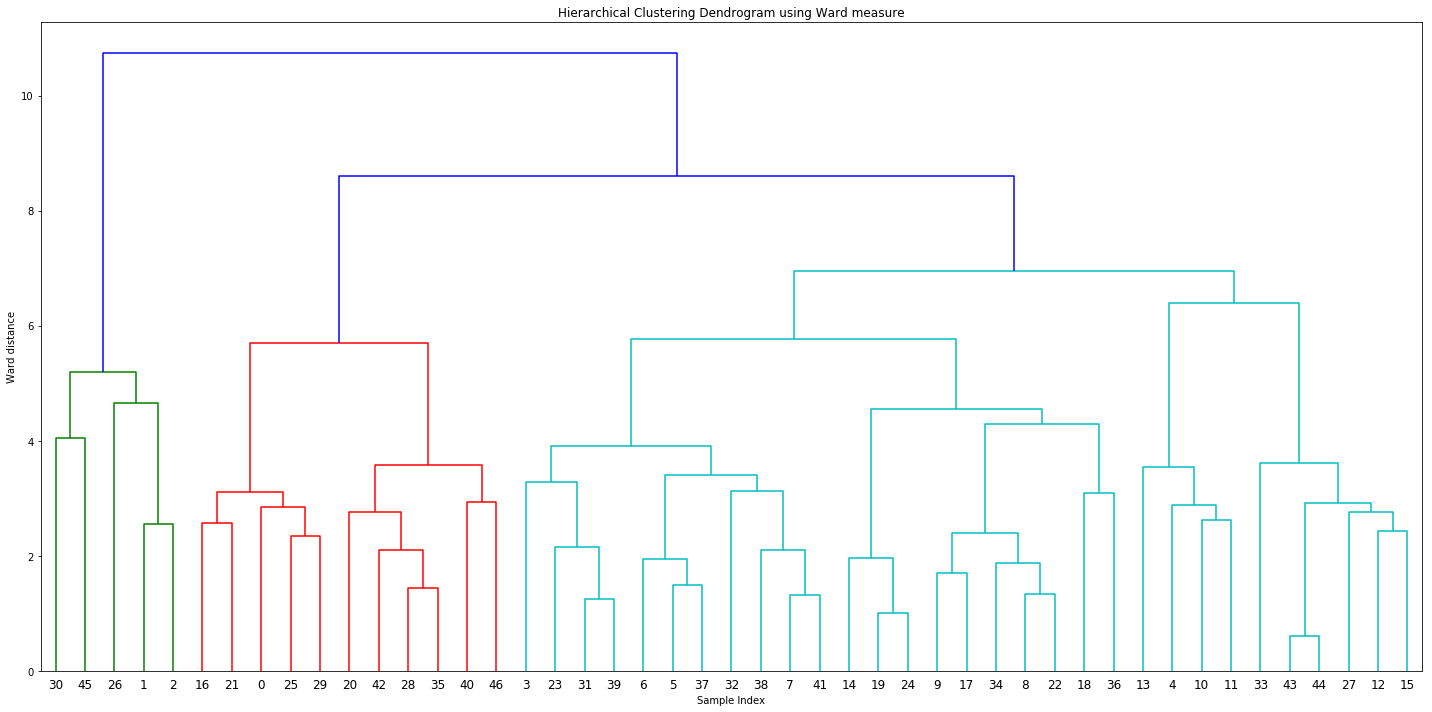

In [142]:
# generate the linkage matrix using Ward
Z_ward = linkage(data, 'ward')
c, coph_dists = cophenet(Z_ward, pdist(data))
# check the Cophenetic Correlation Coefficient
print('the Cophenetic Correlation Coefficient is', c)

# plot
# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram using Ward measure')
plt.xlabel('Sample Index')
plt.ylabel('Ward distance')
dendrogram(
    Z_ward,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    # orientation="right"
)
plt.tight_layout()
plt.show()

#### Elbow Method to identify the best cut point:
* There is a variant of the "elbow method". It tries to find the clustering step where the acceleration of distance growth is the biggest.

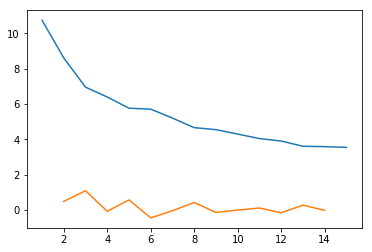

clusters: 3


In [133]:
# identify the best cut point here and provide justification
last = Z_ward[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

#### 'Clustered evenly' method to identify the best cut point:
* Another possible method is to let the data be clustered almost evenly in each cluster if possible. In other words, all clusters should have almost the same number of sample size. Thus once the condition can be satisfied, that number should also be proper for data set.There is trade-off between clusters number and bias definitely.

In [273]:
# count the number of samples in each cluster
def count_num(number_, linkage_matrix):
    list0 = []
    total = list(fcluster(linkage_matrix, number_, criterion='maxclust'))
    for i in range(1, number_+1):
        list0.append(total.count(i))
    print('number for ' + str(number_) + ' clusters')
    print(list0)

for i in range(2, 8):
    count_num(i, Z_ward)
# around 4 clusters would be suitable for this data set

number for 2 clusters
[5, 42]
number for 3 clusters
[5, 11, 31]
number for 4 clusters
[5, 11, 21, 10]
number for 5 clusters
[5, 11, 21, 4, 6]
number for 6 clusters
[5, 11, 11, 10, 4, 6]
number for 7 clusters
[5, 5, 6, 11, 10, 4, 6]


In [272]:
# we can choose 3 clusters here using ward method
def cluster_name_dic(linkage_matrix, number_):
    cluster_dic = {}
    for i in range(1, number_+1):
        cluster_dic[i] = []
    result_ = list(fcluster(linkage_matrix, number_, criterion='maxclust'))
    for i in range(len(result_)):
        cluster_dic[result_[i]].append(music['Name'][i])
    return cluster_dic

print("People's names in each cluster:")
print(cluster_name_dic(Z_ward, 3))

People's names in each cluster:
{1: ['Alexis', 'Alison', 'Dora', 'Mildred', 'Renee'], 2: ['Muriel', 'Flora', 'Karen', 'Chad', 'Gwen', 'Valerie', 'Margie', 'Wendy', 'Lorenzo', 'Isabel', 'Gerald'], 3: ['Christopher', 'Merle', 'Stella', 'Homer', 'Bethany', 'Moses', 'Gertrude', 'Nina', 'Alfredo', 'Ivan', 'William', 'Connie', 'Maryann', 'Irma', 'Rosie', 'Walter', 'Eula', 'Blanca', 'Noah', 'Olga', 'Amelia', 'Gene', 'Benny', 'Emma', 'Phyllis', 'Samantha', 'Irving', 'Nora', 'Maggie', 'Jamie', 'Alberta']}


In [124]:
# find obvious groups by detecting the distance
def find_obvious(linkage_matrix):
    count_ = 0
    groups = {}
    for i in range(len(linkage_matrix)): # replace by Z matrix here
        if linkage_matrix[i][2] < 1: # obvious criteria
            groups[count_] = []
            groups[count_].append(music['Name'][int(linkage_matrix[i][0])])
            groups[count_].append(music['Name'][int(linkage_matrix[i][1])])
            count_ = count_ + 1
    return groups

find_obvious(Z_ward)

{0: ['Jamie', 'Alberta'], 1: ['Walter', 'Noah']}

In [131]:
music[(music['Name'] == "Jamie") | (music['Name'] == "Alberta")]

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
43,Jamie,1,4,5,9,3,10,7,3,8,2,6
44,Alberta,3,6,7,10,5,10,9,5,10,4,8


In [140]:
music[(music['Name'] == "Walter") | (music['Name'] == "Noah")]

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
19,Walter,3,3,3,6,3,8,2,2,6,5,3
24,Noah,3,3,1,6,4,10,2,1,8,6,3


### Comment for Ward Loss Function:
* Using Ward Loss function, the dendrogram has been shown above. I tried two methods to find the best cut point here. The first one is to use the Elbow Method. It aims at finding the clustering step where the acceleration of distance growth is the biggest. Corresponding plots have been shown above. Here the proper number of clusters should be 3. The second method is to let the data be clustered almost evenly in each cluster if possible. 3 or 4 clusters would also make sense. Here we decide to use 3 clusters and there will be 5, 11, 31 samples in each cluster. People's names in each cluster have been shown above.

* We can use two ways to tell whether the result is good or not. The Cophenetic Correlation Coefficient compares (correlates) actual pairwise distances of all the samples to those implied by the hierarchical clustering. Here the Coefficient is 0.6970885555131163. Thus the clustering works well here. Also, we can consider the distance jumps/gaps in the dendrogram. If the gap is too large, it means that some clusters should not be merged or they should not belong to the same cluster. Here the dendrogram looks pretty well then the result should be reliable.  

* To find obvious groups, we care the distance of clusters during the process. If two clusters' distance is smaller than 1, then we can treat them as obvious groups. The result has been shown above and there are two obvious groups. The first one contains 'Jamie' and 'Alberta' and the second one contains 'Walter' and 'Noah'. It can be seen that they have quite similar preference.

the Cophenetic Correlation Coefficient is 0.8056623840497711


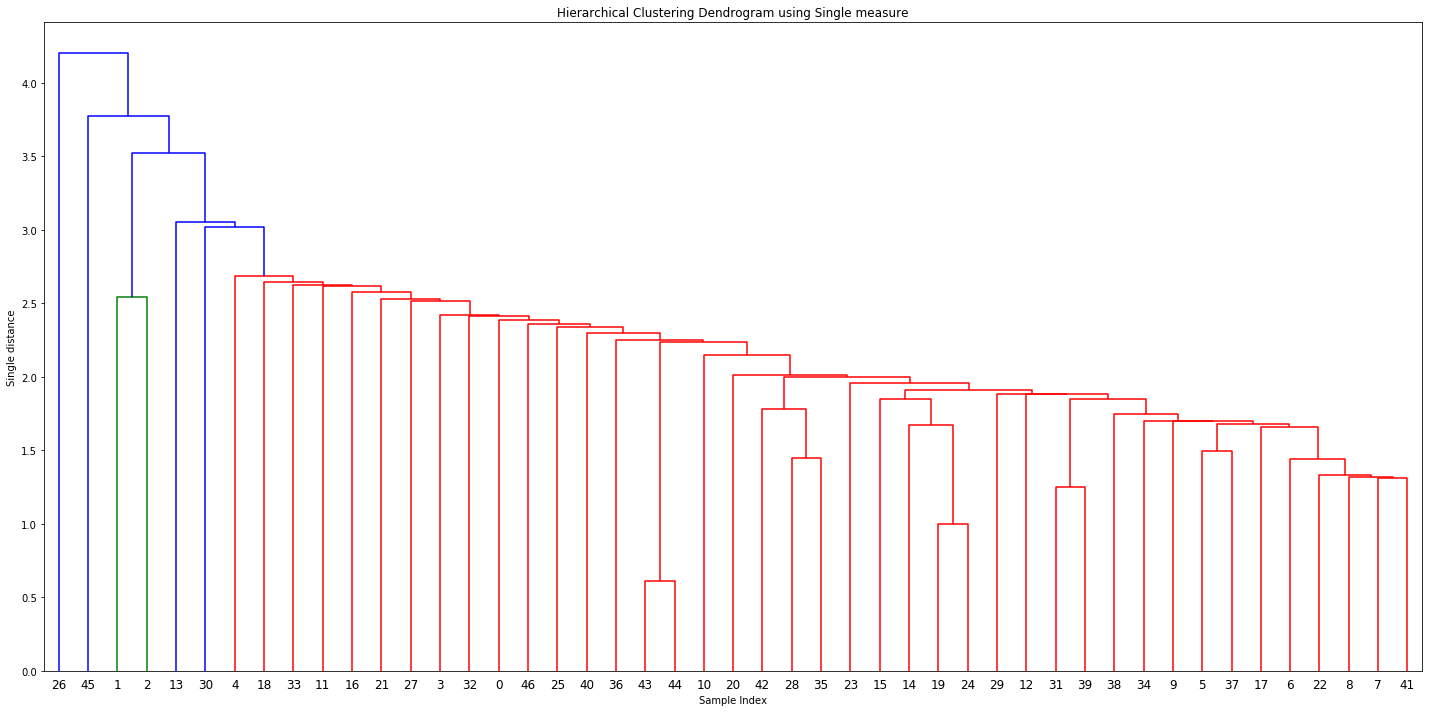

In [143]:
# generate the linkage matrix using min/single
Z_single = linkage(data, 'single')
c, coph_dists = cophenet(Z_single, pdist(data))
# check the Cophenetic Correlation Coefficient
print('the Cophenetic Correlation Coefficient is', c)

# plot
# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram using Single measure')
plt.xlabel('Sample Index')
plt.ylabel('Single distance')
dendrogram(
    Z_single,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    # orientation="right"
)
plt.tight_layout()
plt.show()

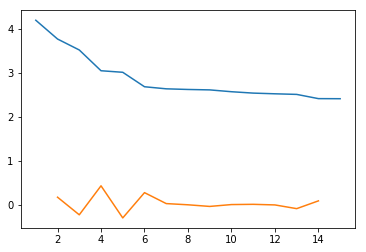

clusters: 4


In [136]:
# identify the best cut point here and provide justification
last = Z_single[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [138]:
for i in range(2, 8):
    count_num(i, Z_single)
# we can choose 4 clusters here using single method
print(cluster_name_dic(Z_single, 4))

number for 2 cluster
[46, 1]
number for 3 cluster
[45, 1, 1]
number for 4 cluster
[2, 43, 1, 1]
number for 5 cluster
[2, 42, 1, 1, 1]
number for 6 cluster
[2, 41, 1, 1, 1, 1]
number for 7 cluster
[2, 40, 1, 1, 1, 1, 1]
{1: ['Alexis', 'Alison'], 2: ['Muriel', 'Christopher', 'Merle', 'Stella', 'Homer', 'Bethany', 'Moses', 'Gertrude', 'Nina', 'Alfredo', 'Ivan', 'William', 'Connie', 'Maryann', 'Flora', 'Irma', 'Rosie', 'Walter', 'Karen', 'Chad', 'Eula', 'Blanca', 'Noah', 'Gwen', 'Olga', 'Valerie', 'Margie', 'Mildred', 'Amelia', 'Gene', 'Benny', 'Emma', 'Wendy', 'Phyllis', 'Samantha', 'Irving', 'Nora', 'Lorenzo', 'Maggie', 'Isabel', 'Jamie', 'Alberta', 'Gerald'], 3: ['Renee'], 4: ['Dora']}


In [139]:
find_obvious(Z_single)

{0: ['Jamie', 'Alberta'], 1: ['Walter', 'Noah']}

### Comment for Single Loss Function:
* Using Single Loss function, the dendrogram has been shown above. I tried two methods to find the best cut point here, which have been described in details in Ward Loss comment. Under Elbow Method, the proper number of clusters should be 4. Under 'Clustered evenly' Criteria, it is a little bit hard to find a proper number. Thus we decide to use 4 clusters and there will be 2, 43, 1, 1 samples in each cluster. People's names have been shown above.

* The Cophenetic Correlation Coefficient compares (correlates) actual pairwise distances of all the samples to those implied by the hierarchical clustering. Here the Cophenetic Correlation Coefficient is 0.8056623840497711. Thus the clustering works well here. Also, we can consider the distance jumps/gaps in the dendrogram. If the gap is too large, it means that some clusters should not be merged or they should not belong to the same cluster. There are no big jumps in this dendrogram but too many samples are classified in one cluster here. 

* To find obvious groups, we care the distance of clusters during the process. If two clusters' distance is smaller than 1, then we can treat them as obvious groups. The result has been shown above and there are two obvious groups. These two groups are the same as the result shown in Ward Loss above.

* Compared with Ward Loss function, Single Loss function fails to work that well since too many samples are in one cluster.

the Cophenetic Correlation Coefficient is 0.5841169903852643


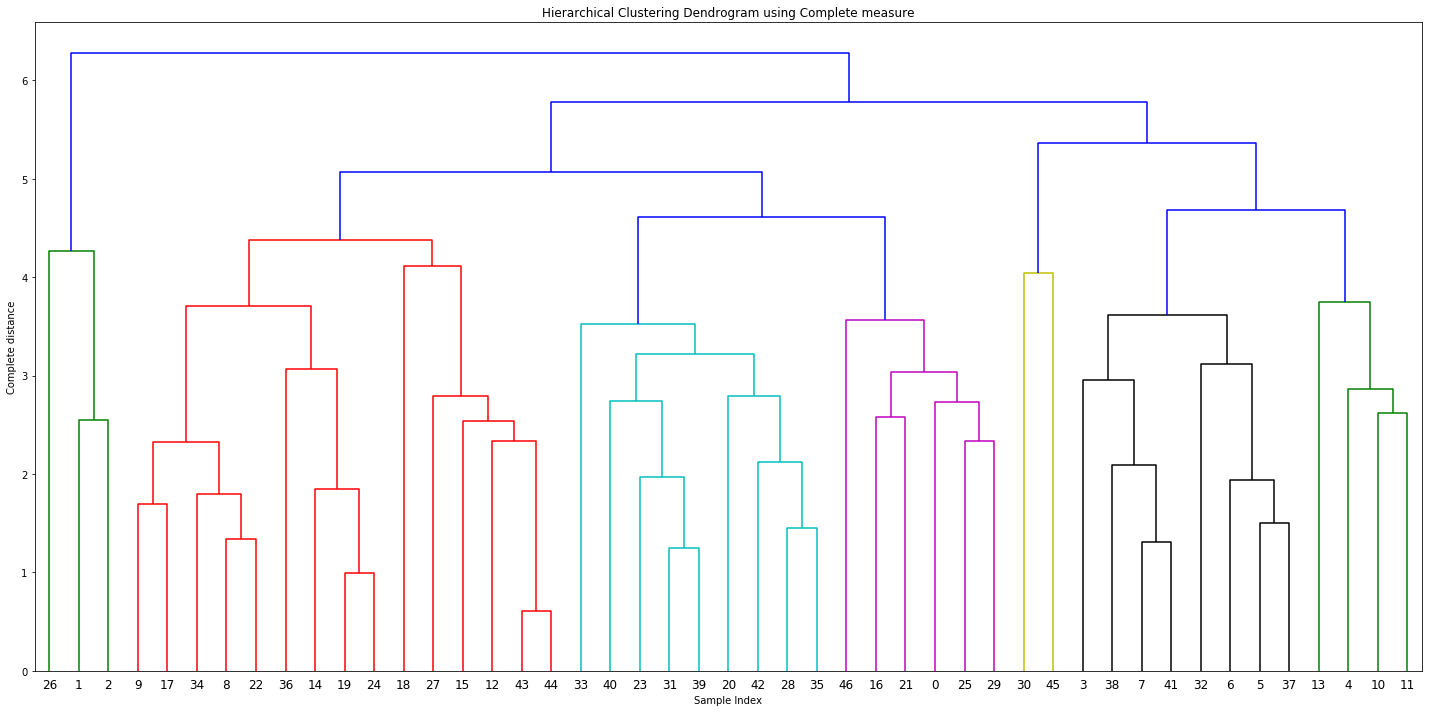

In [144]:
# generate the linkage matrix using max/complete
Z_complete = linkage(data, 'complete')
c, coph_dists = cophenet(Z_complete, pdist(data))
# check the Cophenetic Correlation Coefficient
print('the Cophenetic Correlation Coefficient is', c)

# plot
# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram using Complete measure')
plt.xlabel('Sample Index')
plt.ylabel('Complete distance')
dendrogram(
    Z_complete,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    # orientation="right"
)
plt.tight_layout()
plt.show()

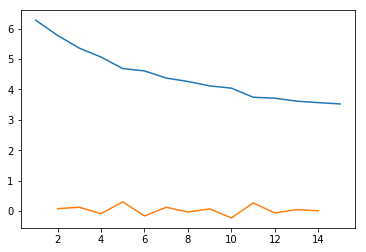

clusters: 5


In [145]:
# identify the best cut point here and provide justification
last = Z_complete[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [146]:
for i in range(2, 8):
    count_num(i, Z_complete)
# we can choose 5 clusters here using complete method
print(cluster_name_dic(Z_complete, 5))

number for 2 cluster
[3, 44]
number for 3 cluster
[3, 30, 14]
number for 4 cluster
[3, 30, 2, 12]
number for 5 cluster
[3, 15, 15, 2, 12]
number for 6 cluster
[3, 15, 15, 2, 8, 4]
number for 7 cluster
[3, 15, 9, 6, 2, 8, 4]
{1: ['Alexis', 'Alison', 'Dora'], 2: ['Moses', 'Gertrude', 'Ivan', 'Connie', 'Maryann', 'Irma', 'Rosie', 'Walter', 'Eula', 'Noah', 'Olga', 'Emma', 'Phyllis', 'Jamie', 'Alberta'], 3: ['Muriel', 'Flora', 'Karen', 'Chad', 'Blanca', 'Gwen', 'Valerie', 'Margie', 'Amelia', 'Benny', 'Wendy', 'Nora', 'Lorenzo', 'Isabel', 'Gerald'], 4: ['Mildred', 'Renee'], 5: ['Christopher', 'Merle', 'Stella', 'Homer', 'Bethany', 'Nina', 'Alfredo', 'William', 'Gene', 'Samantha', 'Irving', 'Maggie']}


In [152]:
find_obvious(Z_complete)

{0: ['Jamie', 'Alberta'], 1: ['Walter', 'Noah']}

### Comment for Complete Loss Function:
* Using Complete Loss function, the dendrogram has been shown above. I tried two methods to find the best cut point here, which have been described in details in Ward Loss comment. Under Elbow Method, the proper number of clusters should be 5. Under 'Clustered evenly' Criteria, Around 5 clusters would also make sense. Thus we decide to use 5 clusters and there will be 
3, 15, 15, 2, 12 samples in each cluster. People's names have been shown above.

* The Cophenetic Correlation Coefficient compares (correlates) actual pairwise distances of all the samples to those implied by the hierarchical clustering. Here the Cophenetic Correlation Coefficient is 0.5841169903852643. Although the clustering fails to reflect actual distances that well compared with the first two loss functions, it is still acceptable. Also, we can consider the distance jumps/gaps in the dendrogram. If the gap is too large, it means that some clusters should not be merged or they should not belong to the same cluster. There are no big jumps in this dendrogram and the plot looks pretty well.

* To find obvious groups, we care the distance of clusters during the process. If two clusters' distance is smaller than 1, then we can treat them as obvious groups. The result has been shown above and there are two obvious groups. These two groups are the same as the result shown in Ward Loss above.

* Compared with the first two methods, the Complete Loss function works well since it balances the sample size in each cluster and their similarities.

the Cophenetic Correlation Coefficient is 0.793695300289029


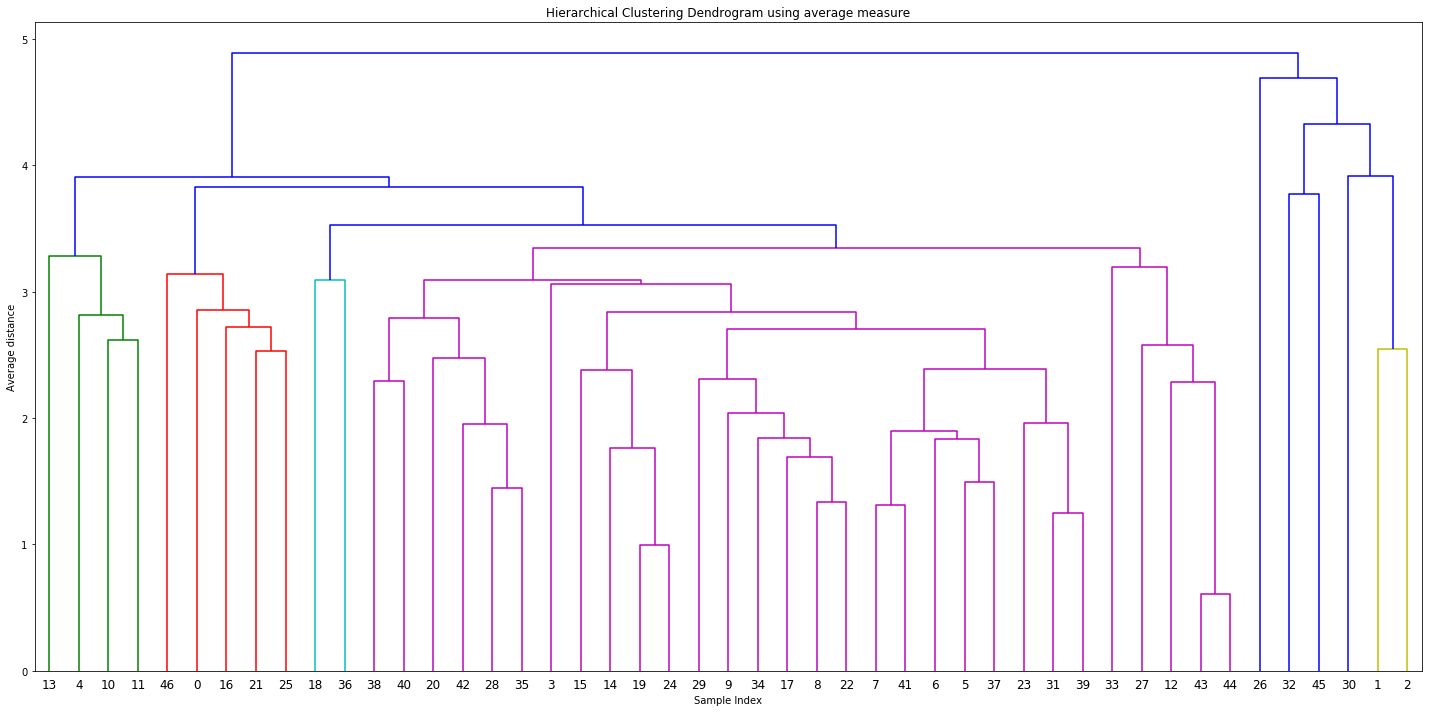

In [148]:
# generate the linkage matrix using average
Z_average = linkage(data, 'average')
c, coph_dists = cophenet(Z_average, pdist(data))
# check the Cophenetic Correlation Coefficient
print('the Cophenetic Correlation Coefficient is', c)

# plot
# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram using average measure')
plt.xlabel('Sample Index')
plt.ylabel('Average distance')
dendrogram(
    Z_average,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    # orientation="right"
)
plt.tight_layout()
plt.show()

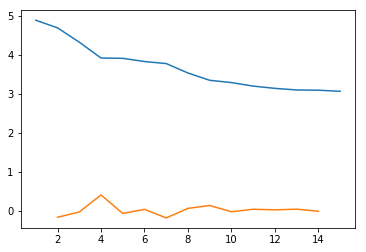

clusters: 4


In [149]:
# identify the best cut point here and provide justification
last = Z_average[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [151]:
for i in range(2, 8):
    count_num(i, Z_average)
# we can choose 5 clusters here using average method
print(cluster_name_dic(Z_average, 4))

number for 2 cluster
[41, 6]
number for 3 cluster
[41, 5, 1]
number for 4 cluster
[41, 2, 3, 1]
number for 5 cluster
[41, 2, 2, 1, 1]
number for 6 cluster
[4, 37, 2, 2, 1, 1]
number for 7 cluster
[4, 5, 32, 2, 2, 1, 1]
{1: ['Muriel', 'Christopher', 'Merle', 'Stella', 'Homer', 'Bethany', 'Moses', 'Gertrude', 'Nina', 'Alfredo', 'Ivan', 'William', 'Connie', 'Maryann', 'Flora', 'Irma', 'Rosie', 'Walter', 'Karen', 'Chad', 'Eula', 'Blanca', 'Noah', 'Gwen', 'Olga', 'Valerie', 'Margie', 'Amelia', 'Benny', 'Emma', 'Wendy', 'Phyllis', 'Samantha', 'Irving', 'Nora', 'Lorenzo', 'Maggie', 'Isabel', 'Jamie', 'Alberta', 'Gerald'], 2: ['Gene', 'Renee'], 3: ['Alexis', 'Alison', 'Mildred'], 4: ['Dora']}


In [153]:
find_obvious(Z_average)

{0: ['Jamie', 'Alberta'], 1: ['Walter', 'Noah']}

### Comment for Average Loss Function:
* Using Average Loss function, the dendrogram has been shown above. I tried two methods to find the best cut point here, which have been described in details in Ward Loss comment. Under Elbow Method, the proper number of clusters should be 4. Under 'Clustered evenly' Criteria, it is a little bit hard to find a proper number. Thus we decide to use 4 clusters and there will be 41, 2, 3, 1 samples in each cluster. People's names have been shown above.

* The Cophenetic Correlation Coefficient compares (correlates) actual pairwise distances of all the samples to those implied by the hierarchical clustering. Here the Cophenetic Correlation Coefficient is 0.793695300289029. Thus the clustering works well here. Also, we can consider the distance jumps/gaps in the dendrogram. If the gap is too large, it means that some clusters should not be merged or they should not belong to the same cluster. There are no big jumps in this dendrogram but too many samples are classified in one cluster here. 

* To find obvious groups, we care the distance of clusters during the process. If two clusters' distance is smaller than 1, then we can treat them as obvious groups. The result has been shown above and there are two obvious groups. These two groups are the same as the result shown in Ward Loss above.

* Compared with the other functions, Average Loss function fails to work that well since too many samples are in one cluster. This result is quite similar to Single Loss function's result.

### Methods that may improve the result:
* Scale or Normalization before clustering may be helpful but these variables are in the same scale now. Also, we can set the maximum variance allowed in each cluster. In order to isolate elements that are too "far" from majority, we may detect some outliers ahead of time and put these outliers into separated clusters to decrease variance. 

### Finally compare all these methods with K-means method:
* Hierarchical clustering is usually preferable, as it is both more flexible and has fewer hidden assumptions about the distribution of underlying data.

* With k-Means clustering, we need to have a sense ahead-of-time what the desired number of clusters is (this is the 'k' value). Also, k-means will often give unintuitive results if the data is not well-separated into sphere-like clusters or value 'k' is not well-suited to the shape of your data. 

* In contrast, hierarchical clustering has fewer assumptions about the distribution of data - the only requirement (which k-means also shares) is that a distance can be calculated each pair of data points. Hierarchical clustering typically 'joins' nearby points into a cluster, and then successively adds nearby points to the nearest group. We end up with a 'dendogram', or a sort of connectivity plot. We can use that plot to decide after the fact how many clusters our data has, by cutting the dendogram at different heights. Hierarchical clustering can be more computationally expensive, but usually produces more intuitive results.

* Within hierarchical clustering methods, Average and Single Loss functions may not work that well for this data set since they fail to divide the samples very well. Both Ward and Complete Loss functions can be applied here and the proper number of clusters would be around 4.

# Bonus (10 points): Vector Quantization

To complete this bonus section you'll need to install the ```imageio``` package.

We can also use K-Means clustering for image compression by reducing the number of colors in an image to *k*. We'll try this for the next question.

![](resources/mandrill-large.png)

`mandrill-large.png` is a 512×512 pixel image represented in 24-bit color. What this means is that for each of the 262144 pixels in the image, there are three numbers ranging from 0 to 255. Let's load it up.

In [230]:
import imageio
mandrill = np.float64(imageio.imread("data/resources-HW5/mandrill-large.png"))
mandrill

Image([[[164., 150.,  71.],
        [ 63.,  57.,  31.],
        [ 75.,  43.,  10.],
        ...,
        [117., 119.,  68.],
        [141., 170., 101.],
        [179., 188., 118.]],

       [[120., 125.,  62.],
        [135.,  97.,  33.],
        [ 55.,  35.,  23.],
        ...,
        [122., 140.,  98.],
        [136., 159., 128.],
        [120., 138.,  74.]],

       [[ 99.,  74.,  31.],
        [132., 118.,  46.],
        [ 60.,  41.,  36.],
        ...,
        [118.,  93.,  90.],
        [ 87.,  91.,  77.],
        [ 96.,  80.,  49.]],

       ...,

       [[121., 148., 155.],
        [123., 156., 150.],
        [124., 150., 139.],
        ...,
        [110.,  73.,  60.],
        [ 90.,  93.,  70.],
        [ 81.,  80.,  60.]],

       [[126., 169., 168.],
        [117., 151., 151.],
        [121., 136., 133.],
        ...,
        [ 73.,  84.,  68.],
        [ 99.,  69.,  86.],
        [ 80.,  63.,  71.]],

       [[  9.,  11.,  12.],
        [ 10.,  12.,  11.],
        [ 11.,  

In [231]:
mandrill.shape

(512, 512, 3)

To make it easier to work with (especially for `plt.imshow()`), we'll convert each pixel to a float from the default 8-bit per pixel integer coding. We divide by 255 to normalize it to the range [0-1].

In [232]:
mandrill = np.array(mandrill, dtype=np.float64) / 255
mandrill

array([[[0.64313725, 0.58823529, 0.27843137],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411765, 0.16862745, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666667],
        [0.55294118, 0.66666667, 0.39607843],
        [0.70196078, 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313725],
        [0.52941176, 0.38039216, 0.12941176],
        [0.21568627, 0.1372549 , 0.09019608],
        ...,
        [0.47843137, 0.54901961, 0.38431373],
        [0.53333333, 0.62352941, 0.50196078],
        [0.47058824, 0.54117647, 0.29019608]],

       [[0.38823529, 0.29019608, 0.12156863],
        [0.51764706, 0.4627451 , 0.18039216],
        [0.23529412, 0.16078431, 0.14117647],
        ...,
        [0.4627451 , 0.36470588, 0.35294118],
        [0.34117647, 0.35686275, 0.30196078],
        [0.37647059, 0.31372549, 0.19215686]],

       ...,

       [[0.4745098 , 0.58039216, 0.60784314],
        [0.48235294, 0.61176471, 0.58823529],
        [0.48627451, 0

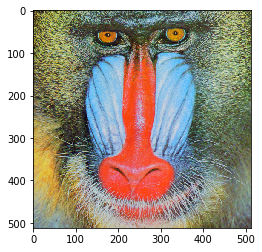

In [233]:
plt.imshow(mandrill)
plt.show()

Let's reshape it into a 2D array. This gives us a long array of [RGB pixel values](https://en.wikipedia.org/wiki/RGB_color_model).

In [234]:
w, h, d = original_shape = tuple(mandrill.shape)
image_array = np.reshape(mandrill, (w * h, d))
# reshape -- keep RGB 3-dimension and turn all 512*512 atoms into one dimension
image_array

array([[0.64313725, 0.58823529, 0.27843137],
       [0.24705882, 0.22352941, 0.12156863],
       [0.29411765, 0.16862745, 0.03921569],
       ...,
       [0.01960784, 0.03137255, 0.01960784],
       [0.00784314, 0.01960784, 0.        ],
       [0.01568627, 0.01960784, 0.00784314]])

In [235]:
image_array.shape

(262144, 3)

In [251]:
frame = pd.DataFrame(image_array)
frame2 = frame.drop_duplicates()
unique = len(frame2)
print('number of different vectors in this image:', unique)

number of different vectors in this image: 230427



* After running `KMeans`, you should have 16 centroids, where each centroid is a vector of 3 dimensions corresponding to the 16 quantized RGB values you need. Ensure that this is the case by looking at the `kmeans.cluster_centers_`, assuming `kmeans` is the result of your clustering.
* Replace the values in `image_array` with the centroid values. To know which cluster each pixel of `image_array` falls in, you can run `.predict(image_array)` on the result of your `KMeans` clustering. Then from the cluster, you can get the centroid value from `.cluster_centters_` mentioned above.
* Recreate the image data to be displayed. Show it with `plt.imshow()`. How does it look? By how much have we compressed the results?
* Try a few different values of *k* and compare the results.

In [253]:
k_means_model = KMeans(init='k-means++', n_clusters=16, n_init=50)
kmeans = k_means_model.fit(image_array)

In [254]:
print(kmeans.predict(image_array))
# 16 centroids
kmeans.cluster_centers_

[12  8  8 ...  8  8  8]


array([[0.38235314, 0.53232761, 0.64532958],
       [0.29036383, 0.29973289, 0.23122185],
       [0.89961061, 0.36234287, 0.3248067 ],
       [0.33830723, 0.4100691 , 0.39655019],
       [0.79937121, 0.6715138 , 0.28026727],
       [0.82533973, 0.49468283, 0.53336136],
       [0.46814622, 0.71989118, 0.89063869],
       [0.42664986, 0.4096045 , 0.25807944],
       [0.19098783, 0.17184651, 0.15351631],
       [0.72606541, 0.73459116, 0.68258786],
       [0.47786388, 0.53172336, 0.43906599],
       [0.65028156, 0.76932887, 0.86422173],
       [0.60067965, 0.51767054, 0.27201291],
       [0.55976987, 0.6384128 , 0.6054029 ],
       [0.93055144, 0.29469429, 0.1485832 ],
       [0.677311  , 0.68544237, 0.45899518]])

In [255]:
# replace the image_array with the centroids
predict_list = kmeans.predict(image_array)
centroid_list = kmeans.cluster_centers_.tolist()

In [256]:
import copy
image_array_replace = copy.deepcopy(image_array)
for i in range(len(predict_list)):
    image_array_replace[i] = centroid_list[predict_list[i]]

In [257]:
image_array2 = np.reshape(image_array_replace, (w, h, d))

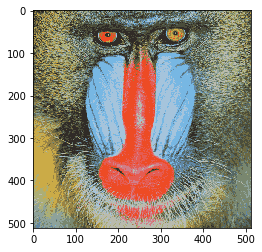

In [258]:
plt.imshow(image_array2)
plt.show()

In [274]:
print('Compress Rate:', str((1-16/unique)*100)+'%')

Compress Rate: 99.99305636926228%


### Comment for 16 centroids:
* Number of distinct vectors in this image is 230427.
* 16 quantized RGB centroids vectors have been shown above. After replacing the values in image_array with corresponding centroids, we recreate the image data and the image is also shown above. This figure looks quite similar to the original image. Since we use 16 vectors to replace 230427 different vectors, the compress rate is 99.99305636926228%.

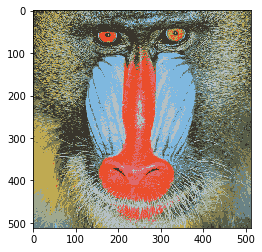

In [260]:
# 10 centroids
k_means_model = KMeans(init='k-means++', n_clusters=10, n_init=50)
kmeans = k_means_model.fit(image_array)
predict_list = kmeans.predict(image_array)
centroid_list = kmeans.cluster_centers_.tolist()
image_array_replace = copy.deepcopy(image_array)
for i in range(len(predict_list)):
    image_array_replace[i] = centroid_list[predict_list[i]]
image_array2 = np.reshape(image_array_replace, (w, h, d))

plt.imshow(image_array2)
plt.show()

In [276]:
print('Compress Rate:', str((1-10/unique)*100)+'%')

Compress Rate: 99.99566023078893%


### Comment for 10 centroids:
* Number of distinct vectors in this image is 230427.
* After replacing the values in image_array with corresponding centroids, we recreate the image data and the image is also shown above. This figure looks quite similar to the original image but not as clear as the 16 centroids' result. Since we use 10 vectors to replace 230427 different vectors, the compress rate is 99.99566023078893%.

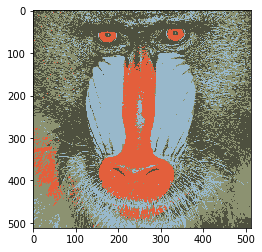

In [262]:
# 4 centroids
k_means_model = KMeans(init='k-means++', n_clusters=4, n_init=50)
kmeans = k_means_model.fit(image_array)
predict_list = kmeans.predict(image_array)
centroid_list = kmeans.cluster_centers_.tolist()
image_array_replace = copy.deepcopy(image_array)
for i in range(len(predict_list)):
    image_array_replace[i] = centroid_list[predict_list[i]]
image_array2 = np.reshape(image_array_replace, (w, h, d))

plt.imshow(image_array2)
plt.show()

In [277]:
print('Compress Rate:', str((1-4/unique)*100)+'%')

Compress Rate: 99.99826409231557%


### Comment for 4 centroids:
* Number of distinct vectors in this image is 230427.
* After replacing the values in image_array with corresponding centroids, we recreate the image data and the image is also shown above. The mandrill can still be recognized but not as clear as the 10 centroids' result. Since we use 4 vectors to replace 230427 different vectors, the compress rate is 99.99826409231557%.

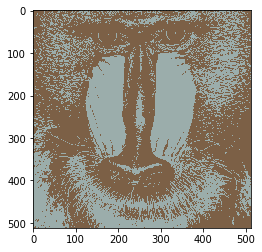

In [264]:
# 2 centroids
k_means_model = KMeans(init='k-means++', n_clusters=2, n_init=50)
kmeans = k_means_model.fit(image_array)
predict_list = kmeans.predict(image_array)
centroid_list = kmeans.cluster_centers_.tolist()
image_array_replace = copy.deepcopy(image_array)
for i in range(len(predict_list)):
    image_array_replace[i] = centroid_list[predict_list[i]]
image_array2 = np.reshape(image_array_replace, (w, h, d))

plt.imshow(image_array2)
plt.show()

In [278]:
print('Compress Rate:', str((1-2/unique)*100)+'%')

Compress Rate: 99.9991320461578%


### Comment for 2 centroids:
* Number of distinct vectors in this image is 230427.
* After replacing the values in image_array with corresponding centroids, we recreate the image data and the image is also shown above. This image is very interesting since there are only two colors in the image. We can only recognize the mandrill here but tell nothing about its colors. Since we use 2 vectors to replace 230427 different vectors, the compress rate is 99.9991320461578%.